In [1]:
import sklearn
import pandas as pd
import numpy as np
import pydotplus
import os
import csv
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from IPython.display import Image

In [2]:
shopping_data = pd.read_csv(".\shopping_Korea_U.csv")
shopping_data

,Gender,Age,PL1,PL2,PL3,PL4,F1,F2,F3,F4,...,PE2,PE3,PE4,D1,D2,D3,E1,E2,E3,E4
0,0,23,1,3,3,3,3,4,3,4,...,3,3,3,2,2,2,3,3,4,2
1,0,21,2,1,5,3,3,4,3,4,...,3,3,3,3,2,3,3,3,4,2
2,1,22,3,5,5,2,1,4,3,4,...,3,3,3,3,3,3,2,3,3,4
3,1,23,3,5,5,3,3,3,3,3,...,3,3,3,3,3,4,3,3,3,3
4,0,21,3,5,5,1,3,3,3,5,...,3,1,1,3,3,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,22,4,5,5,5,5,4,4,3,...,4,4,4,5,4,5,4,5,4,5
326,0,21,4,5,4,3,3,3,3,2,...,5,3,5,5,2,5,4,2,4,5
327,0,24,5,5,5,5,3,2,3,2,...,3,5,4,3,3,4,5,2,5,2
328,1,21,5,3,4,4,4,3,4,5,...,3,3,5,3,4,4,5,4,3,4


In [3]:
X = np.array(pd.DataFrame(shopping_data, columns = ['Age', 'PL1', 'PL2', "PL3","PL4",
                                                   "F1", "F2", "F3", "F4",
                                                   "PR1", "PR2", "PR3", "PR4",
                                                   "PE1","PE2", "PE3", "PE4",
                                                   "D1", "D2", "D3",
                                                   "E1", "E2", "E3","E4"]))
y = np.array(pd.DataFrame(shopping_data, columns = ["Gender"]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
dt_clf = DecisionTreeClassifier( max_depth=None,random_state=0)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


In [17]:
feature_names = shopping_data.columns.tolist()
feature_names = feature_names[1:25]
target_name = np.array(["Woman", "Man"])

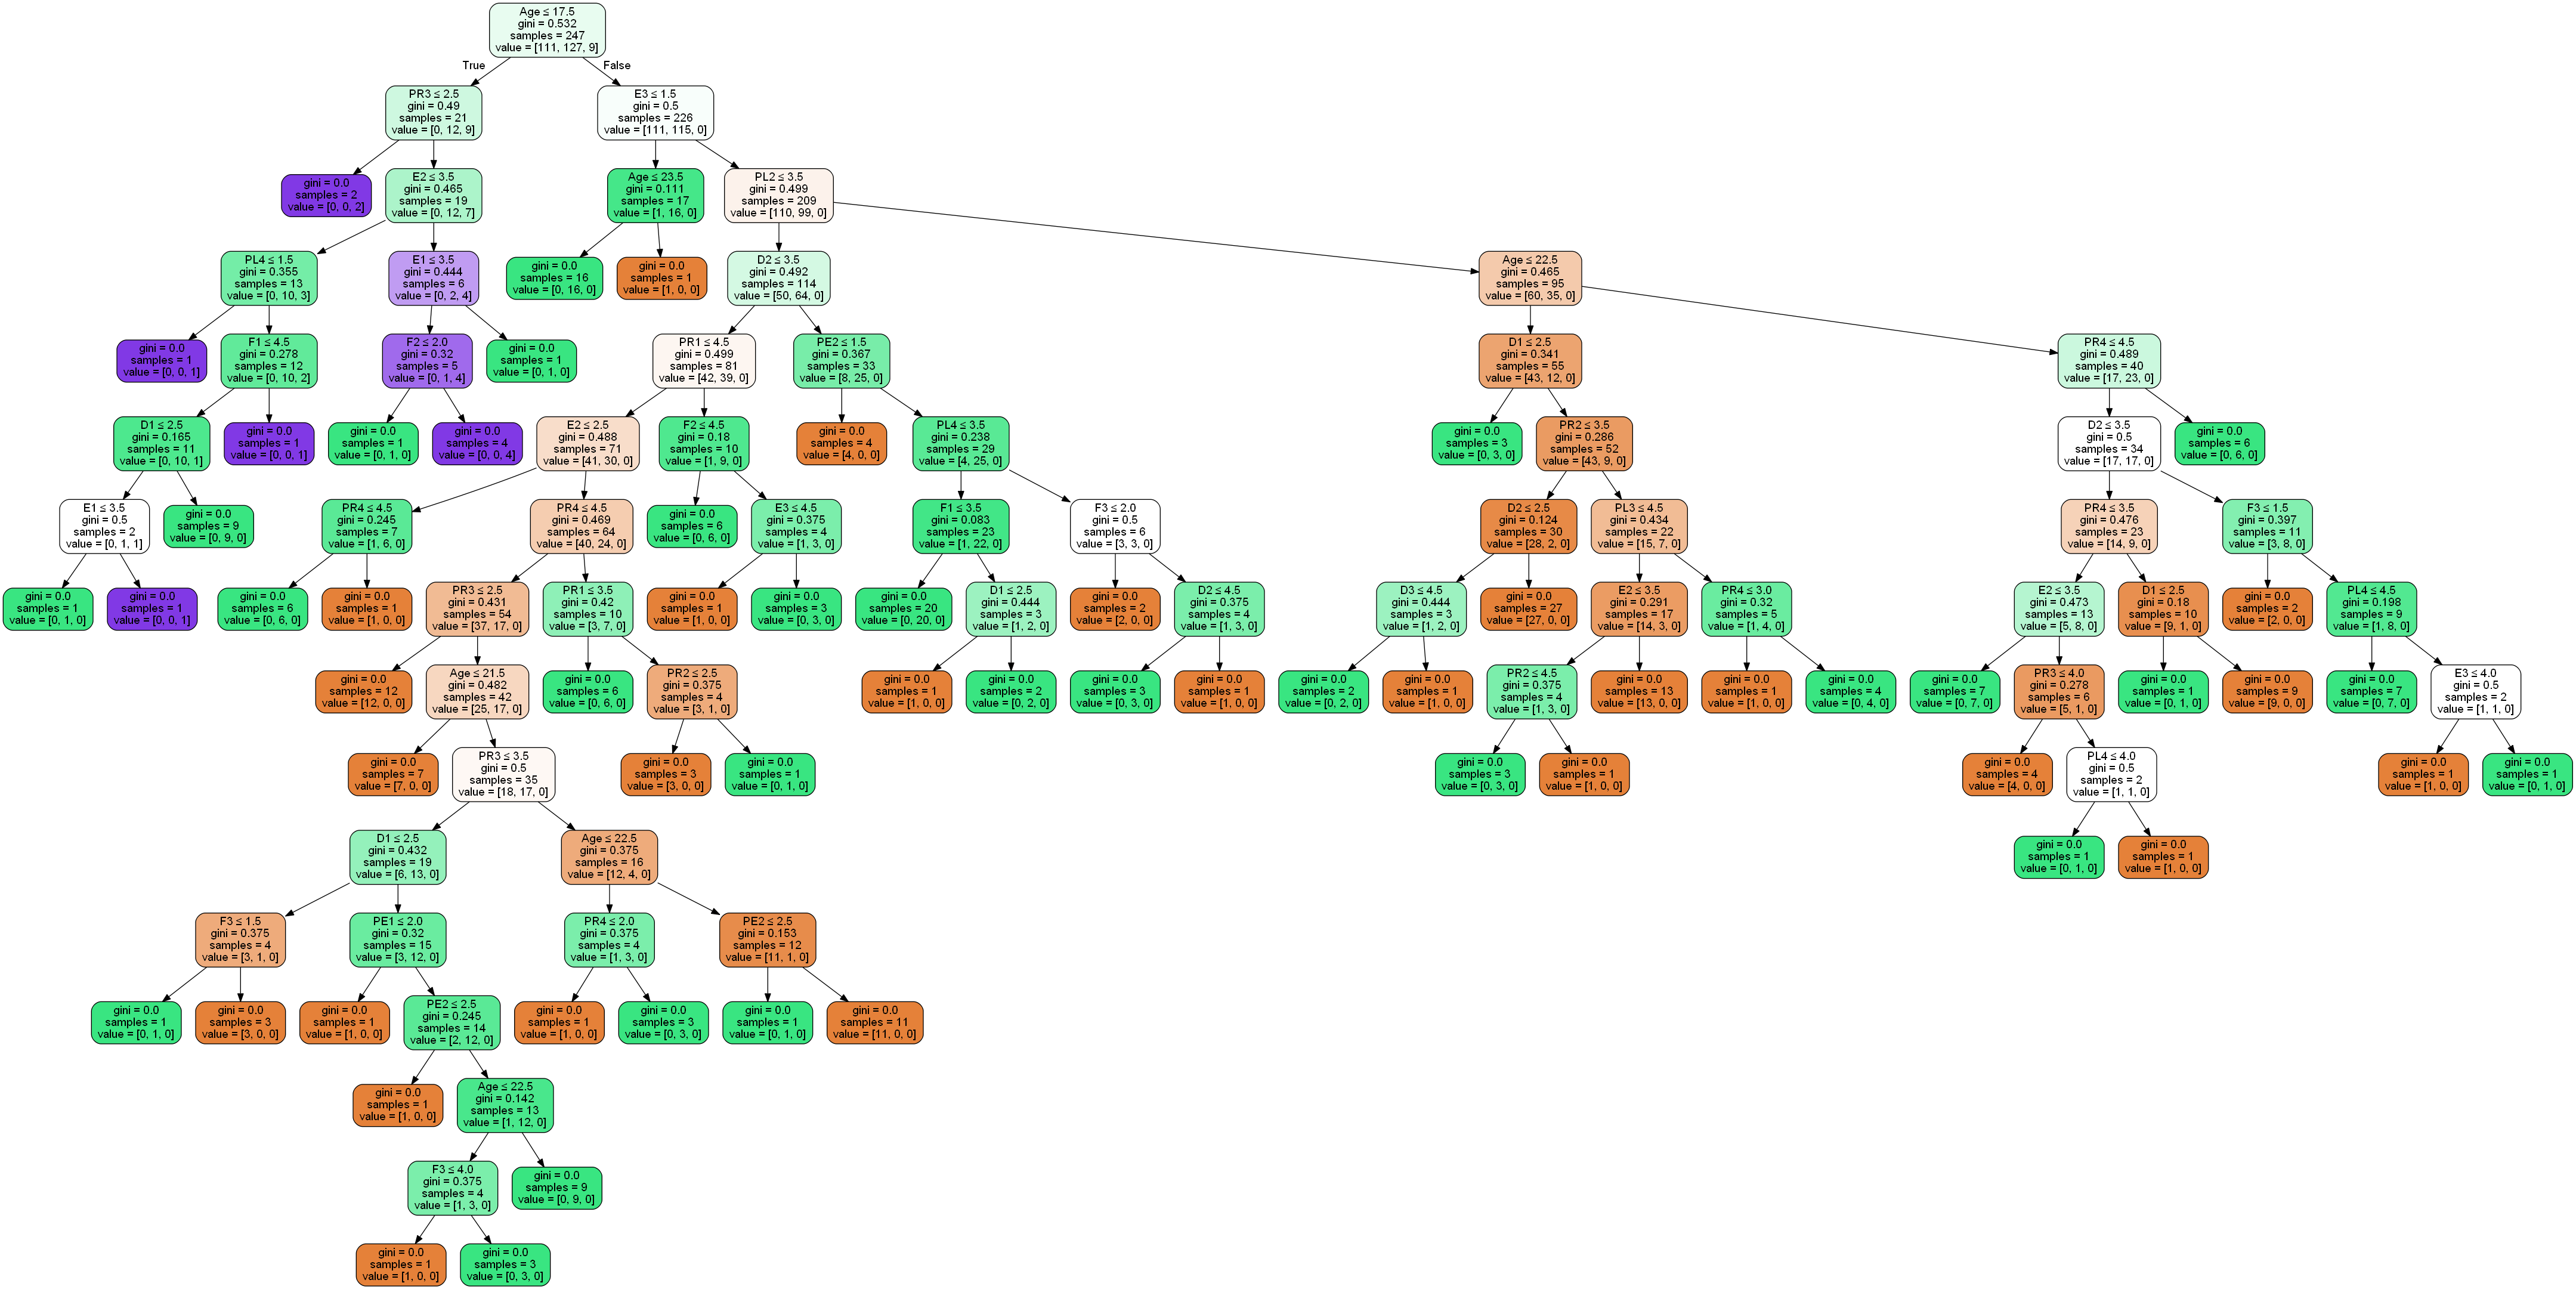

In [18]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names,
                                   filled = True, rounded = True,
                                   special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())